In [11]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
df=pd.DataFrame(data,columns=iris.feature_names)
print(data)
print(df.info())
print(df.describe())
print(df.head())


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:

# Step 1: Standardize the data (important for PCA)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)
print(data_standardized)


[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


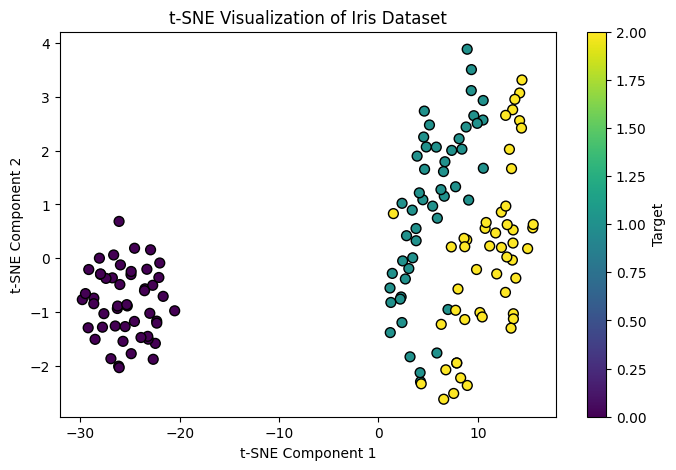

In [ ]:
# Apply t-SNE
#t-Distributed Stochastic Neighbor Embedding
y=iris.target
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(data_standardized)

# Plot t-SNE results
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='Target')
plt.title("t-SNE Visualization of Iris Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


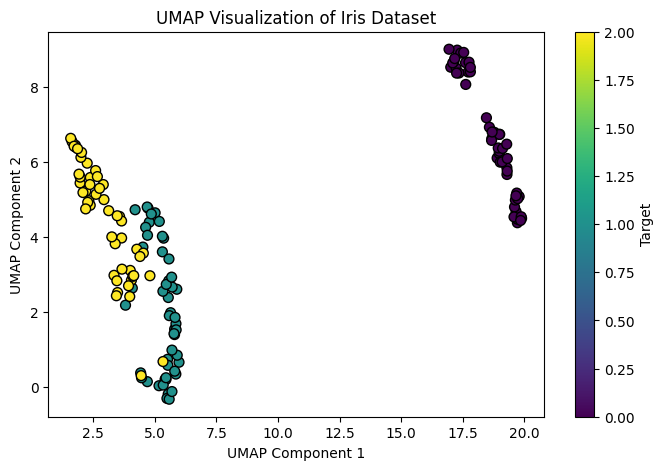

In [7]:
# Apply UMAP
#UMAP (Uniform Manifold Approximation and Projection)
!pip install umap-learn

import umap.umap_ as umap
umap_reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_reducer.fit_transform(data_standardized)

# Plot UMAP results
plt.figure(figsize=(8, 5))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='Target')
plt.title("UMAP Visualization of Iris Dataset")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()


In [ ]:
import numpy as np
# Step 2: Calculate the Covariance Matrix
covariance_matrix = np.cov(data_standardized.T)
print("covariance Matrix:",covariance_matrix)

covariance Matrix: [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [ ]:
# Step 3: Calculate Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("Eigenvalues:",eigenvalues)
print("Eigenvectors:",eigenvectors)

Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [ ]:
# Step 4: Sort Eigenvalues and Eigenvectors
# Sort eigenvalues and eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print("Sorted Eigenvalues:",sorted_eigenvalues)
print("Sorted Eigenvectors:",sorted_eigenvectors)

Sorted Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Sorted Eigenvectors: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [ ]:
# Step 5: Select the top k eigenvectors (k principal components)


top_eigenvectors = sorted_eigenvectors[:, :n_components]
print("Top Eigenvectors:",top_eigenvectors)

# Step 6: Transform the data onto the new feature space (Principal Component Space)
data_pca_manual = data_standardized.dot(top_eigenvectors)
print("PCA Data (Manual):",data_pca_manual[:5])

# Verify with scikit-learn's PCA
pca = PCA(n_components=3)
data_pca_sklearn = pca.fit_transform(data_standardized)
print("PCA Data (Scikit-learn):",data_pca_sklearn[:5])

Top Eigenvectors: [[ 0.52106591]
 [-0.26934744]
 [ 0.5804131 ]
 [ 0.56485654]]
PCA Data (Manual): [[-2.26470281]
 [-2.08096115]
 [-2.36422905]
 [-2.29938422]
 [-2.38984217]]
PCA Data (Scikit-learn): [[-2.26470281  0.4800266   0.12770602]
 [-2.08096115 -0.67413356  0.23460885]
 [-2.36422905 -0.34190802 -0.04420148]
 [-2.29938422 -0.59739451 -0.09129011]
 [-2.38984217  0.64683538 -0.0157382 ]]


Explained Variance Ratio: [0.72962445 0.22850762 0.03668922]


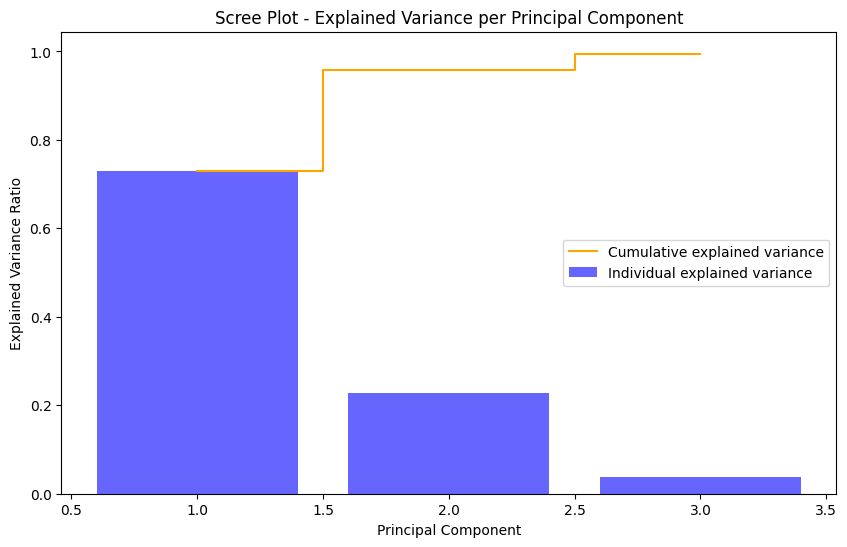

In [ ]:
# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:",explained_variance)


# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='b', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', color='orange', label='Cumulative explained variance')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Explained Variance per Principal Component')
plt.legend(loc='best')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Choose components that explain ~95% of variance
n_components = np.argmax(explained_variance >= 0.95) + 1
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_standardized)
print(f"Number of components chosen: {n_components}")
print(data_pca[:5])

# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Step 2: Fit PCA on the training data only
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train)

# Step 3: Apply the PCA transformation to the test set
X_test_pca = pca.transform(X_test)
# Step 4: Train a Logistic Regression model on the PCA-reduced training data
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
cv_scores = cross_val_score(clf, X_train_pca, y_train, cv=5)
print("Cross-Validation Scores: ", cv_scores)
print("Average Cross-Validation Score: ", np.mean(cv_scores))
clf.fit(X_train_pca, y_train)

# Step 5: Predict and evaluate on the PCA-transformed test data
y_pred = clf.predict(X_test_pca)

# Print evaluation metrics
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Number of components chosen: 1
[[-2.26470281]
 [-2.08096115]
 [-2.36422905]
 [-2.29938422]
 [-2.38984217]]
Cross-Validation Scores:  [1.         0.91666667 0.875      0.95833333 0.875     ]
Average Cross-Validation Score:  0.925
Accuracy Score:  0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi